In [50]:
from PIL import Image

In [42]:
img =Image.open("/home/ubuntu/gangmin/test/frame14051.jpg")
img
time=img.crop((630,50,658,65))
time

In [21]:
time=img.crop((600,40,700,70))
time

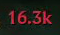

In [174]:
t_b=img.crop((1000,110,1040,160))
t_b


time=img.crop(())
#t_b.save('')

In [187]:
g_b=img.crop((760,10,820,50))
g_b
g_r=img.crop((1140,10,1200,45))
g_r
time=img.crop((930,70,1000,100))
time


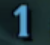

In [144]:
k_b=img.crop((1380,120,1430,165))
k_b

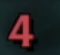

In [145]:
k_r=img.crop((1480,110,1540,165))
k_r

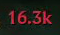

In [173]:

#g_r.convert("L")
#g_r.convert("L").save('gold_crop.png')


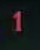

In [241]:
t_r=img.crop((1890,110,1930,160))
t_r

In [150]:
status=img.crop((1090,420,1800,480))

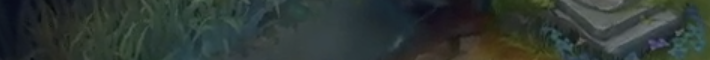

In [151]:
status

In [249]:
import io
import os
from google.cloud import vision
from google.cloud.vision import types
os.environ['GOOGLE_APPLICATION_CREDENTIALS']="/home/ubuntu/2020_1/cap/google_hyein.json"

def image_to_byte_array(image:Image):
    imgbyteArr=io.BytesIO()
    image.save(imgbyteArr,format='PNG')
    imgbyteArr=imgbyteArr.getvalue()
    return imgbyteArr
def crop_image(img):
    t_b=img.crop((1000,110,1040,160))
    t_b=image_to_byte_array(t_b)
    
    g_b=img.crop((1135,115,1240,160))
    g_b=image_to_byte_array(g_b)
    
    k_b=img.crop((1380,120,1430,165))
    k_b=image_to_byte_array(k_b)
    
    k_r=img.crop((1480,110,1540,165))
    k_r=image_to_byte_array(k_r)
    
    g_r=img.crop((1700,110,1800,160))
    g_r=image_to_byte_array(g_r)
    
    t_r=img.crop((1890,110,1930,160))
    t_r=image_to_byte_array(t_r)
    
    status=img.crop((1090,420,1800,480))
    status=image_to_byte_array(status)
    
    replay=img.crop((100,100,400,300))
    replay=image_to_byte_array(replay)
    return t_b, g_b,k_b,k_r,g_r,t_r,status,replay

def vision_api(file_name):
    client=vision.ImageAnnotatorClient()
    img =Image.open(file_name)
    
    t_b, g_b,k_b,k_r,g_r,t_r,status,replay=crop_image(img)
    dash_list=[t_b, g_b,k_b,k_r,g_r,t_r,status,replay]
    name_list=["tower_blue","gold_blue","kill_blue","kill_red","gold_red","tower_red","status","replay"]
    text_list={}
    for idx,imgbyteArr in enumerate(dash_list):
        image=types.Image(content=imgbyteArr)
        response=client.document_text_detection(image=image)
        texts=response.text_annotations
        try:
            text_list[name_list[idx]]=(texts[0].description.strip()).lower()
        except:
            text_list[name_list[idx]]=''
        """
        for i,text in enumerate(texts):
            print('\n" : {}"'.format(text.description))
            if i==0:
                text_list[name_list[idx]]=text.description[:-1]
        """
        

        if response.error.message:
            raise Exception(
                '{}\nFor more info on error messages, check: '
                'https://cloud.google.com/apis/design/errors'.format(
                    response.error.message))
        
    print(text_list)
    return score_cal(text_list)
        
def score_cal(text_list):
    name_list=["tower_blue","gold_blue","kill_blue","kill_red","gold_red","tower_red","status","replay"]
    score_list={}
    if "REPLAY" in text_list['replay']:
        score_list['replay']=True
    else:
        score_list['replay']=False
        ######t_b
        try:
            t_b=text_list['tower_blue'].replace('о','0')
            score_list['tower_blue']=int(t_b)
        except:
            print("can not recognize tower_blue")
            score_list['tower_blue']=0

        ######g_b
        try:
            g_b=text_list['gold_blue'].replace(',','.')
            score_list['gold_blue']=float(g_b[:-1])#k 제거
        except:
            print("can not recognize gold_blue")
            score_list['gold_blue']=0
        
        ######k_b
        try:
            k_b=text_list['kill_blue'].replace('о','0')        
            score_list['kill_blue']=int(k_b)
        except:
            print("can not recognize kill_blue")
            score_list['kill_blue']=0

        
        ######k_r
        try:
            k_r=text_list['kill_red'].replace('о','0')        
            score_list['kill_red']=int(k_r) 
        except:
            print("can not recognize kill_red")
            score_list['kill_red']=0
        
        ######g_r
        try:
            g_r=text_list['gold_red'].replace(',','.')
            score_list['gold_red']=float(g_r[:-1])#k 제거
        except:
            print("can not recognize gold_red")
            score_list['gold_red']=0
        
        ######tower_red
        try:
            t_r=text_list['tower_red'].replace('о','0')
            score_list['tower_red']=int(t_r)    
        except:
            print("can not recognize tower_red")
            score_list['tower_red']=0
        
        ######status
        status=[]
        if "dragon" in status:
            status=[1,0]
            score_list['status']=status
        elif "baron" in status:
            status=[0,1]
            score_list['status']=status
        else:
            status=[0,0]
            score_list['status']=status   
    return score_list
vision_api('dragon-4.png')

{'tower_blue': 'о', 'gold_blue': '22.7k', 'kill_blue': '2', 'kill_red': '6', 'gold_red': '26.4k', 'tower_red': '', 'status': 'red team has slain the dragon!', 'replay': '5:00'}
can not recognize tower_red
{'replay': False, 'tower_blue': 0, 'gold_blue': 22.7, 'kill_blue': 2, 'kill_red': 6, 'gold_red': 26.4, 'tower_red': 0, 'status': [0, 0]}


{'replay': False,
 'tower_blue': 0,
 'gold_blue': 22.7,
 'kill_blue': 2,
 'kill_red': 6,
 'gold_red': 26.4,
 'tower_red': 0,
 'status': [0, 0]}

In [41]:
imgbyteArr

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1a\x00\x00\x00\x19\x08\x06\x00\x00\x00/\xde>`\x00\x00\x0cEiCCPICC Profile\x00\x00x\x9c\x95W\x07TS\xc9\x1a\x9e[RIh\x81\x08H\t\xbd\x89"\xbdH\t\xa1E\x10\x90*\xd8\x08I \xa1\xc4\x98\x10D\xec\xca\xa2\x82k\x17\x11\xb0\xa1\xab"\x8a\xae\x05\x90\xb5b/\x8bb\xef\x0f\x0b*\xca\xbaX\xb0\xa1\xf2&\x05t\xf5\xbc\xf7\xce\xfb\xcf\x99;_\xfe\xf9\xe7\xfbK\xe6\xce\x9d\x01@\xa7\x9a\'\x95\xe6\xa2\xba\x00\xe4I\xf2e\xf1\x11!\xac1\xa9i,\xd2c\x80\x02\x1cP\x81\x0e@y|\xb9\x94\x1d\x17\x17\r\xa0\xf4\xf7\xff\x94w\xd7\x01\xa2\xec\xaf\xb8(\xb9~\x1e\xff\xaf\xa2\'\x10\xca\xf9\x00 q\x10g\x08\xe4\xfc<\x88\xf7\x01\x80\x17\xf3\xa5\xb2|\x00\x88>Po=%_\xaa\xc4\xe3 6\x90\xc1\x00!\x96*q\x96\x1a\x17+q\x86\x1aW\xa8l\x12\xe39\x10\xef\x00\x80L\xe3\xf1dY\x00h7A=\xab\x80\x9f\x05y\xb4oB\xec*\x11\x88%\x00\xe8\x90!\x0e\xe4\x8bx\x02\x88#!\x1e\x92\x977I\x89\xa1\x1dp\xc8\xf8\x8e\'\xeb\x1f\x9c\x19\x03\x9c<^\xd6\x00V\xe7\xa2\x12r\xa8X.\xcd\xe5M\xfd?\xcb\xf1\xbf%/W\xd1\xef\xc3\x0e6\x9aH\x16\x19\xaf

In [82]:
img =Image.open("dragon-4.png")
img2=img.crop((1000,110,1030,160))
img2

In [245]:
img=image_to_byte_array(t_r.convert("L"))


In [246]:
client=vision.ImageAnnotatorClient()
image=types.Image(content=img)
response=client.document_text_detection(image=image)
texts=response.text_annotations
print(texts[0].description.strip())

if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))

IndexError: list index (0) out of range

In [24]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
print(pytesseract.image_to_string(time))

Ca


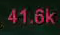

In [154]:
import os
img =Image.open("/home/ubuntu/gangmin/frame/frame3395.jpg")
g_b=img.crop((760,10,820,50))
g_b_new=g_b.convert("L").resize((g_b.size[0]*5,g_b.size[1]*5))
g_r=img.crop((1140,10,1200,45))

#g_b.convert("L").save('gold_crop.png')
#os.system("convert gold_crop.png -resize 500% gold_r2.png ")
g_r

In [121]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
print(pytesseract.image_to_string(thresh))

’ Qs a

C2

ares Ny ate
020 LOL PRO LEAGUE SPRIN
gflearnn a7

——

RAS SARS
g[rasea, 8 Co ape ee

afd re 23 Te) fe [oo eas 7
RECS SB | 00 |

i

 

e —__

fe!


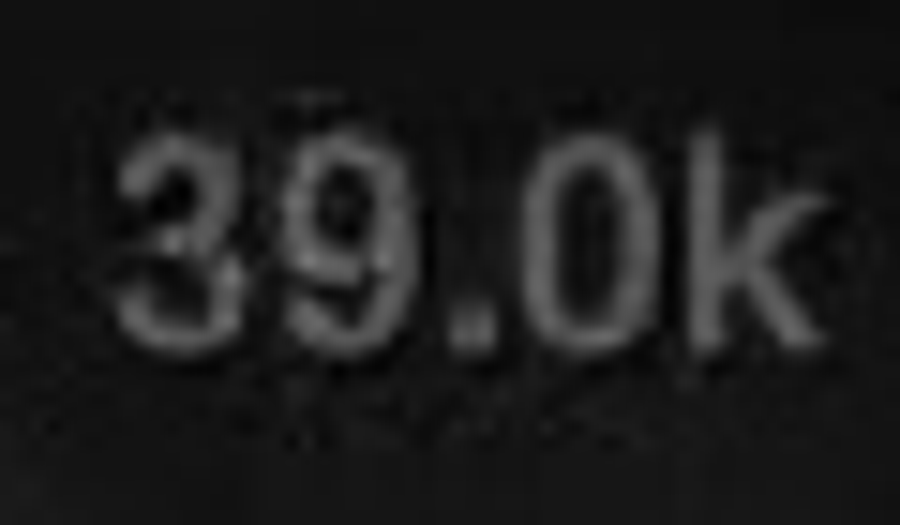

In [76]:
g_r=img.crop((1140,10,1200,45))
g_r_new=g_r.convert("L").resize((g_r.size[0]*15,g_r.size[1]*15))
g_r_new

In [37]:
g_new=g_b.convert("L").resize((105*5,45*5))

In [38]:
pytesseract.image_to_string(g_new)

'22.7k'

In [207]:
from PIL import Image
import pytesseract
import csv
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'

def image_ocr(image):
    img =Image.open(image)
    g_b=img.crop((760,10,820,50))
    g_r=img.crop((1140,10,1200,45))
    g_b_new=g_b.resize((g_b.size[0]*5,g_b.size[1]*5))
    g_r_new=g_r.resize((g_r.size[0]*5,g_r.size[1]*5))
    time=img.crop((930,70,1000,100))
    time_new=time.resize((time.size[0]*5,time.size[1]*5))
    
    g_b_new.save('./g_b_r.png')
    g_r_new.save('./g_r_r.png')
    time_new.save('./time_r.png')
    
    img1 = cv2.imread('./g_b_r.png',cv2.IMREAD_GRAYSCALE)
    thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #thresh1 = cv2.Canny(np.uint8(img1 * 255), 50, 100)

    img2 = cv2.imread('./g_r_r.png',cv2.IMREAD_GRAYSCALE)
    thresh2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #thresh2 = cv2.Canny(np.uint8(img2 * 255), 50, 100)

    img3 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
    #thresh3 = cv2.Canny(np.uint8(img3 * 255), 50, 100)

    thresh3 = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    g_b_text=pytesseract.image_to_string(thresh1)
    g_r_text=pytesseract.image_to_string(thresh2)
    time_text=pytesseract.image_to_string(thresh3)

    #print("Gold_blue :",g_b_text," Gold_Red : ",g_r_text)
    return {"gold_blue":g_b_text,"gold_red":g_r_text,"time":time_text}
image_ocr("/home/ubuntu/gangmin/frame2/frame35.jpg")

{'gold_blue': '16.4k', 'gold_red': '16.3k', 'time': '10:40'}

In [191]:

for i in range(3300,3400):
    file_name='/home/ubuntu/gangmin/frame/frame{}.jpg'.format(i)
    image_ocr(file_name)
    with open('gold_ocr2.csv', 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['gold_blue','gold_red','time'])
        writer.writerow(image_ocr(file_name))

In [113]:
import cv2
import numpy as np

In [146]:
img = cv2.imread('./',cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

SystemError: <built-in function imread> returned NULL without setting an error

In [128]:
import io
g_b.convert("L")

def image_to_byte_array(image:Image):
    imgbyteArr=io.BytesIO()
    image.save(imgbyteArr,format='PNG')
    imgbyteArr=imgbyteArr.getvalue()
result=image_to_byte_array(g_b)

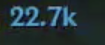

In [145]:
g_b

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
#print(pytesseract.image_to_string(thresh))

NameError: name 'thresh' is not defined

In [39]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame380.jpg")
time=img.crop((650,40,700,70))

time_new=time.resize((time.size[0]*5,time.size[1]*5))

time_new.save('./time_r.png')
img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
"""
dst = cv2.cornerHarris(img1, 9, 3, 0.01)
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
dst = np.uint8(dst)
"""
#edges = cv2.Canny(np.uint8(img1 * 255), 50, 100)


print(pytesseract.image_to_string(thresh1))

In [40]:
time

In [17]:
import cv2
import numpy as np

for i in range(476):
    img =Image.open("/home/ubuntu/gangmin/test/frame{}.jpg".format(i))
    time=img.crop((620,48,680,70))

    time_new=time.resize((time.size[0]*5,time.size[1]*5))

    time_new.save('./time_r.png')
    img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
    thresh1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    """
    dst = cv2.cornerHarris(img1, 9, 3, 0.01)
    dst = cv2.dilate(dst, None)
    ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
    dst = np.uint8(dst)
    """
    #edges = cv2.Canny(np.uint8(img1 * 255), 50, 100)

    
    print('{} : '.format(i)+pytesseract.image_to_string(thresh1))

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/gangmin/test/frame0.jpg'

In [29]:
time

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'/usr/bin/tesseract'
import cv2
import numpy as np
from PIL import Image
import os
import json
import pandas as pd

In [24]:
name=pd.read_csv('./id_name_match.csv',names=['name','team1','team2','gameid','time','1','2','3','4','5','6'])
name=name.drop(['1','2','3','4','5','6'],axis=1)

In [30]:
list(name['name']).index('AHQ vs DWG Highlights Worlds 2019 Main Event Group Stage AHQ eSports Club vs Damwon Gaming by Onivia-lxgtfGgRosg')

name['gameid'][0]

102844401154430631

In [57]:
game_id={}
for f_name in os.listdir('/home/ubuntu/gangmin/frame/frame'):
    try:
        print(f_name)
        key=f_name
        cur=[]
        idx=list(name['name']).index(f_name)
        gid=name['gameid'][idx]

        dir="/home/ubuntu/gangmin/frame/frame/"+f_name
        length=len(os.listdir(dir))
        for pic in range(length):
            img=Image.open(dir+'/'+'frame'+str(pic)+'.jpg')
            time=img.resize((img.size[0]*5,img.size[1]*5))
            time.save('./time_r.png')
            img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
            thresh1 = cv2.threshold(img1, 52, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
            cur.append(pytesseract.image_to_string(thresh1))
        game_id[str(gid)]=cur

    except:
        print(f_name)
        pass
with open('highlights.json', 'a') as f:
    json.dump(game_id, f, indent=2)
        

FPX vs SPY Tiebreaker Highlights Worlds 2019 Main Event Group Stage FunPlus Phoenix vs Splyce by Oni-kyfBb_GYXus
FNC vs SKT Highlights Worlds 2019 Group Stage Fnatic vs SK Telecom T1 by Onivia-5IcSqrmb-gA
GAM vs SPY Highlights Worlds 2019 Main Event Group Stage GAM Esports vs Splyce by Onivia-lZlDbIYCTHM
FLA vs DWG Highlights Worlds 2019 Play in Flamengo Esports vs Damwon Gaming by Onivia-CWEgTq7oxEM
UOL vs MMM Tiebreaker Highlights Worlds 2019 Play in Unicorns of Love vs MAMMOTH by Onivia-Vhix7SiQ-3Y
IG vs AHQ Highlights Worlds 2019 Group Stage Invictus Gaming vs AHQ Esports by Onivia-_ZbNFyD4Gt8
TL vs AHQ Highlights Worlds 2019 Main Event Group Stage Team Liquid vs AHQ eSports Club by Onivia-ypJEHump6ew
FLA vs RY Tiebreaker Highlights Worlds 2019 Play in Flamengo Esports vs Royal Youth by Onivia-MvbKxiWe9-4
C9 vs HKA Highlights Worlds 2019 Main Event Group Stage Cloud9 vs Hong Kong Attitude by Onivia-ZV-8M7TJwS8
HKA vs GRF Highlights Worlds 2019 Main Event Group Stage Hong Kong Attit

DWG vs G2 Highlights Game 2 Worlds 2019 Main Event Quarter Finals Damwon Gaming vs G2 Esports by Oni-bUJvjzS12LM
CG vs UOL Tiebreaker Highlights Worlds 2019 Play in Clutch Gaming vs Unicorns of Love by Onivia-hubKqsF28Gc
JT vs SPY Highlights Worlds 2019 Main Event Group Stage J Team vs Splyce by Onivia-h4pBLbKTJEw
CG vs FNC Highlights Worlds 2019 Main Event Group Stage Clutch Gaming vs Fnatic by Onivia-mSX_Nt0nmCg
FNC vs CG Highlights Worlds 2019 Main Event Group Stage Fnatic vs Clutch Gaming by Onivia-Vn8V6bGEgN8
G2 vs FPX Highlights Game 3 Worlds 2019 Grand Final G2 Esports vs FunPlus Phoenix by Onivia-trzajAYw6R4
FLA vs RY Highlights Worlds 2019 Play in Flamengo Esports vs Royal Youth by Onivia-cScbiv5QAQU
GRF vs IG Highlights Game 3 Worlds 2019 Main Event Quarter Finals Griffin vs Invictus Gaming by Oniv-Cft0ByfL3jw
SPY vs JT Highlights Worlds 2019 Main Event Group Stage Splyce vs J Team by Onivia-eEhz5M1dyrI
SKT vs FNC Highlights Worlds 2019 Main Event Group Stage SK Telecom T1 vs

In [54]:
sss="/home/ubuntu/gangmin/frame/frame/AHQ vs DWG Highlights Worlds 2019 Main Event Group Stage AHQ eSports Club vs Damwon Gaming by Onivia-lxgtfGgRosg"

sorted(os.listdir(sss))[0]

'frame0.jpg'

In [28]:

name='UOL vs SPY Highlights Game 4 Worlds 2019 Play in Round 2 Unicorns of Love vs Splyce by Onivia-uKup4lpKQfI'
#for f_name in os.listdir('home/ubuntu/gangmin/frame'):
dir='/home/ubuntu/gangmin/frame'
temp={}
print(name)
print(len(os.listdir((dir+'/'+'Play In Day 4 All Game Highlights Worlds 2019 By Onivia-3R7hBmmkU-U'))))

UOL vs SPY Highlights Game 4 Worlds 2019 Play in Round 2 Unicorns of Love vs Splyce by Onivia-uKup4lpKQfI
5258


In [13]:
img =Image.open("/home/ubuntu/gangmin/test/frame14226.jpg")
time=img.crop((630,48,660,68))

time_new=time.resize((time.size[0]*5,time.size[1]*5))

time_new.save('./time_r.png')
img1 = cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)
thresh1 = cv2.threshold(img1, 52, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]


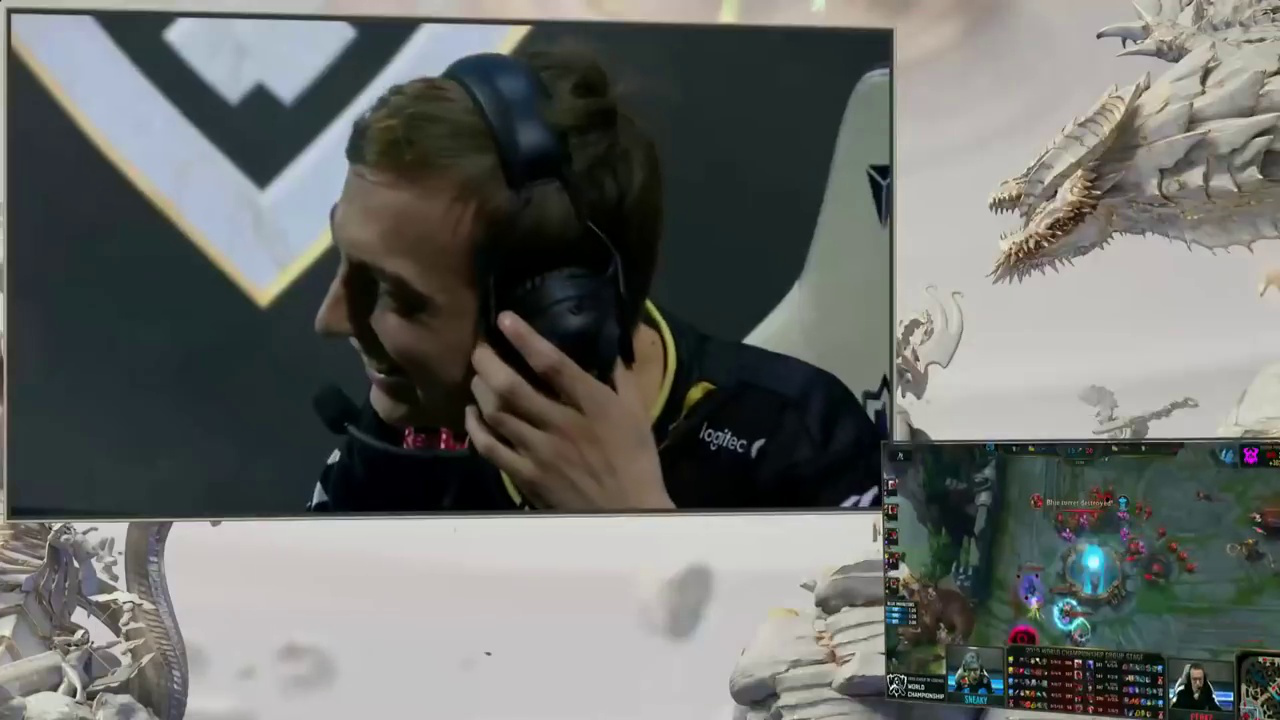

In [52]:
#img = Image.fromarray(thresh1)
img

In [24]:
pytesseract.image_to_string(thresh1)

'10:05'

In [28]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame211.jpg")
time=img.crop((625,48,665,65))

In [60]:
time

In [10]:
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame30.jpg")
time=img.crop((630,50,660,63))

In [16]:
time_new=time.resize((time.size[0]*10,time.size[1]*10))

In [14]:
time.size

(30, 13)

In [17]:
time_new.save('./time_r.png')

In [21]:
x=cv2.imread('./time_r.png',cv2.IMREAD_GRAYSCALE)

In [85]:
img = Image.fromarray(x)

In [105]:
np.mean(image)

51.67530769230769

In [109]:
thresh1 = cv2.threshold(x, 51.67, 255, cv2.THRESH_BINARY)[1]

In [110]:
img = Image.fromarray(thresh1)

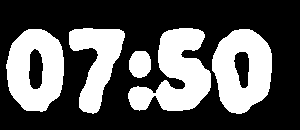

In [111]:
img

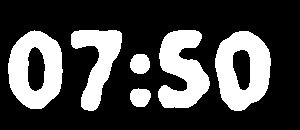

In [118]:
thresh1 = cv2.threshold(x, 51.67, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)[1]
img = Image.fromarray(thresh1)
img

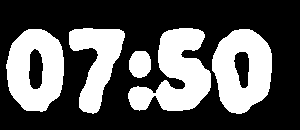

In [113]:
thresh1 = cv2.threshold(x, 51.67, 255, cv2.THRESH_BINARY)[1]
img = Image.fromarray(thresh1)
img

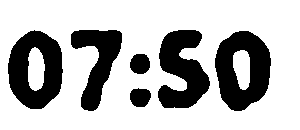

In [120]:
thresh1 = cv2.threshold(x, 51.67, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
img = Image.fromarray(thresh1)
img

In [23]:
name

,name,team1,team2,gameid,time,1,2,3,4,5,6
0,AHQ vs DWG Highlights Worlds 2019 Main Event G...,AHQ,DWG,102844401154430631,2019-10-13T15:21:43.228Z,NaN,NaN,NaN,NaN,NaN,NaN
1,AHQ vs IG Highlights Worlds 2019 Main Event Gr...,AHQ,IG,102844401151874719,2019-10-20T12:10:35.874Z,NaN,NaN,NaN,NaN,NaN,NaN
2,AHQ vs TL Highlights Worlds 2019 Main Event Gr...,AHQ,TL,102844401153578660,2019-10-14T14:14:57.072Z,NaN,NaN,NaN,NaN,NaN,NaN
3,C9 vs G2 Highlights Worlds 2019 Main Event Gro...,C9,G2,102844283025041497,2019-10-18T15:46:29.465Z,NaN,NaN,NaN,NaN,NaN,NaN
4,C9 vs GRF Highlights Worlds 2019 Main Event Gr...,C9,GRF,102844283025696858,2019-10-15T17:07:16.554Z,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,UOL vs SPY Highlights Game 1 Worlds 2019 Play ...,UOL,SPY,102844235747982779,2019-10-08T15:00:37.538Z,NaN,NaN,NaN,NaN,NaN,NaN
116,UOL vs SPY Highlights Game 2 Worlds 2019 Play ...,UOL,SPY,102844235748310460,2019-10-08T16:07:18.00Z,NaN,NaN,NaN,NaN,NaN,NaN
117,UOL vs SPY Highlights Game 3 Worlds 2019 Play ...,UOL,SPY,102844235748703677,2019-10-08T16:59:12.117Z,NaN,NaN,NaN,NaN,NaN,NaN
118,UOL vs SPY Highlights Game 4 Worlds 2019 Play ...,UOL,SPY,102844235749031358,2019-10-08T17:49:29.058Z,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

        img =Image.open(dir+'/'+str(f_name)+'/'+i)
        time=img.crop((630,50,658,65))

        time_new=time.resize((time.size[0]*5,time.size[1]*5))

        time_new.save(dir+'/'+f_name+'/'+i)
        img1 = cv2.imread(dir+'/'+f_name+'/'+i,cv2.IMREAD_GRAYSCALE)
        thresh1 = cv2.threshold(img1, 52, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
        temp[i]=pytesseract.image_to_string(thresh1)
        """
        dst = cv2.cornerHarris(img1, 9, 3, 0.01)
        dst = cv2.dilate(dst, None)
        ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
        dst = np.uint8(dst)
        """
        #edges = cv2.Canny(np.uint8(img1 * 255), 50, 100)
    with open(' .json', 'a') as f:
        json.dump({game_id[idx]:temp}, f, indent=2)

In [ ]:
from PIL import Image
img =Image.open("/home/ubuntu/2020_1/cap/video/test/frame30.jpg")
time=img.crop((630,50,658,65))
time.save(dir+'/'+f_name+'/'+i)